# Assignment 3
### Due 9/23. Do four of five.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [ ]:
df = pd.read_csv('./data/nhanes_data_17_18.csv')

/var/folders/yb/69jvqn_52szfqjzyzmz2vk0h0000gn/T/ipykernel_9024/1829356728.py:1: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/nhanes_data_17_18.csv')


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# variable 1: HowOftenDoYouSnore
df['HowOftenDoYouSnore'].value_counts()

df['HowOftenDoYouSnore_na'] = df['HowOftenDoYouSnore'].isna()
df['HowOftenDoYouSnore_na'].value_counts()

HowOftenDoYouSnore_na
False    5397
True     2969
Name: count, dtype: int64

In [21]:
# variable 2: HowOftenFeelOverlySleepyDuringDay
df['HowOftenFeelOverlySleepyDuringDay'].value_counts()

df['HowOftenFeelOverlySleepyDuringDay_na'] = df['HowOftenFeelOverlySleepyDuringDay'].isna() 
df['HowOftenFeelOverlySleepyDuringDay_na'].value_counts()

HowOftenFeelOverlySleepyDuringDay_na
False    5816
True     2550
Name: count, dtype: int64

In [27]:
pd.crosstab(df['HowOftenDoYouSnore'], df['HowOftenFeelOverlySleepyDuringDay'], normalize='columns')

HowOftenFeelOverlySleepyDuringDay,Almost always - 16-30 times a month,Never,Often- 5-15 times a month,Rarely - 1 time a month,Sometimes - 2-4 times a month
HowOftenDoYouSnore,,,,,
Frequently - 5 or more nights a week,0.408207,0.226097,0.326596,0.241621,0.274780
Never,0.241901,0.386952,0.259574,0.316446,0.261564
Occasionally - 3-4 nights a week,0.149028,0.176603,0.180851,0.175370,0.217511
Rarely - 1-2 nights a week,0.200864,0.210349,0.232979,0.266563,0.246145


My hypothesis of frequent snorers tending to feel more sleepy throughout the day seems to be... correct? Over 40% of subjects who reported feeling sleepy more often than not also snore 5+ nights per week. Conversely, over 50% of the high-energy group either never snores, or only snores once or twice per week.

(Interestingly, the second largest share of the sleepy group belongs to those who claim to never snore.)

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

/var/folders/yb/69jvqn_52szfqjzyzmz2vk0h0000gn/T/ipykernel_9024/2196018247.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DailyMilkDrinkers'] = df_filtered['HowOftenDrankMilkAge512'] == 'Often-once a day or more'


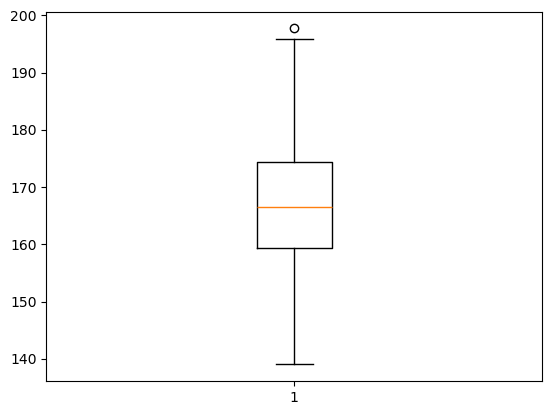

In [48]:
df_filtered = df[df['HowOftenDrankMilkAge512'].notna() & df['StandingHeightCm'].notna()]

# categorical
df_filtered['HowOftenDrankMilkAge512'].value_counts()
df_filtered['DailyMilkDrinkers'] = df_filtered['HowOftenDrankMilkAge512'] == 'Often-once a day or more'

# numeric
plt.boxplot(df_filtered['StandingHeightCm'])
plt.show()

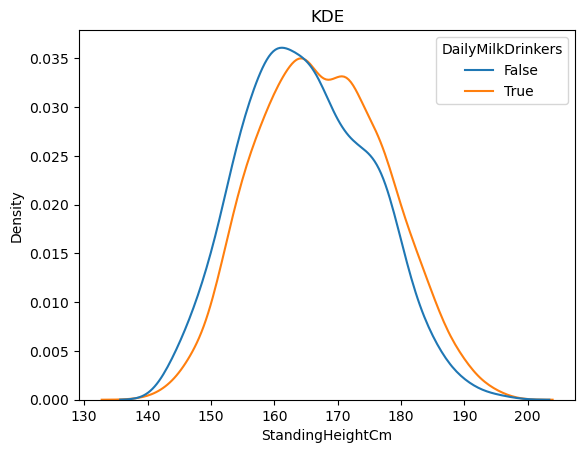

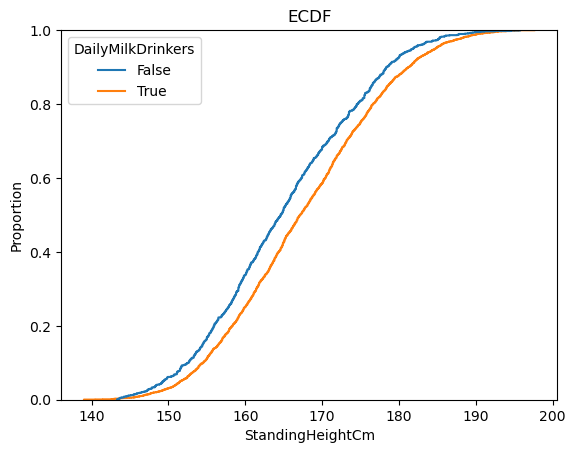

StandingHeightCm                                       \
                             count        mean        std    min    25%   
DailyMilkDrinkers                                                         
False                        957.0  165.131034  10.029380  143.3  157.8   
True                        2798.0  167.565761  10.178507  139.0  159.9   

                                         
                      50%    75%    max  
DailyMilkDrinkers                        
False              164.60  172.5  195.8  
True               167.15  175.0  197.7

In [50]:
conditioner = 'DailyMilkDrinkers'
sns.kdeplot(data=df_filtered, x='StandingHeightCm', hue=conditioner, common_norm=False ).set(title='KDE')
plt.show()
sns.ecdfplot( data=df_filtered, x='StandingHeightCm', hue=conditioner).set(title='ECDF')
plt.show()
df_filtered.loc[:,['StandingHeightCm', conditioner]].groupby(conditioner).describe()

Drinking boatloads of milk as a youth appears to have a *slight* positive effect on height, as evidenced by the separation in the KDE and ECFD plots. Of note is the difference in sample size between the milk drinkers (n = 2798) and non-milk drinkers (n = 957).

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \frac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

#### Step 1) Take the derivative wrt $\hat{y}(z)$ and set it equal to 0.

After chain rule-ing what's inside the sum (treating $\frac{1}{h}k\left(\frac{z-x_i}{h}\right)$ as a constant), you get
$$
\frac{1}{N} \sum_{i=1}^N -2\left\lbrace y_i - \hat{y}(z) \right\rbrace \frac{1}{h}k\left(\frac{z-x_i}{h}\right) = 0.
$$

Pull out a $\frac{-2}{h}$ and you're left with
$$
\frac{-2}{Nh} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace k\left(\frac{z-x_i}{h}\right) = 0.
$$


#### Step 2) Multiple both sides by $\frac{-Nh}{2}$ and rearrange.

$$
\sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace k\left(\frac{z-x_i}{h}\right) = 0
$$

$$
\sum_{i=1}^N y_ik\left(\frac{z-x_i}{h}\right) - \hat{y}(z)k\left(\frac{z-x_i}{h}\right) = 0
$$

$$
\sum_{i=1}^N y_ik\left(\frac{z-x_i}{h}\right) - \sum_{i=1}^N \hat{y}(z)k\left(\frac{z-x_i}{h}\right) = 0
$$


#### Step 3) Solve for $\hat{y}(z)$.

$$
\sum_{i=1}^N \hat{y}(z)k\left(\frac{z-x_i}{h}\right) = \sum_{i=1}^N y_ik\left(\frac{z-x_i}{h}\right)
$$

$$
\hat{y}(z) = \frac{\sum_{i=1}^N y_ik\left(\frac{z-x_i}{h}\right)}{\sum_{i=1}^N k\left(\frac{z-x_i}{h}\right)}
$$


And there we have it, folks. Minimizing the $MSE$ at fixed $X=z$ gives the LCLS estimator.

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome